# Import

## Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasgui as pdgui
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import PredictionErrorDisplay
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

## Import data

`train` dataset

In [2]:
df = pd.read_excel("maroun.xlsx")
df.head()

,sazman ab rain,khanzenyan rain,ghalat rain,maroun rain
0,8.5,20.0,10.5,11.0
1,25.0,40.0,55.0,49.0
2,16.5,28.0,55.0,55.0
3,7.5,23.0,2.0,22.0
4,3.0,27.0,29.0,26.0


In [25]:
# Seperate X and Y
X = df[["sazman ab rain", "khanzenyan rain", "ghalat rain"]]
Y = df[["maroun rain"]]

display(X.head(5))
display(Y)

,sazman ab rain,khanzenyan rain,ghalat rain
0,8.5,20.0,10.5
1,25.0,40.0,55.0
2,16.5,28.0,55.0
3,7.5,23.0,2.0
4,3.0,27.0,29.0


,maroun rain
0,11.0
1,49.0
2,55.0
3,22.0
4,26.0
...,...
259,9.5
260,30.0
261,14.0
262,17.0


In [26]:
# create test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False, train_size=0.7)

In [27]:
print(f"Type X train: {type(X_train)}")
print(f"Type X test: {type(X_test)}")
print(f"Type Y train: {type(Y_train)}")
print(f"Type Y test: {type(Y_test)}")


Type X train: <class 'pandas.core.frame.DataFrame'>
Type X test: <class 'pandas.core.frame.DataFrame'>
Type Y train: <class 'pandas.core.frame.DataFrame'>
Type Y test: <class 'pandas.core.frame.DataFrame'>


Visualize train data

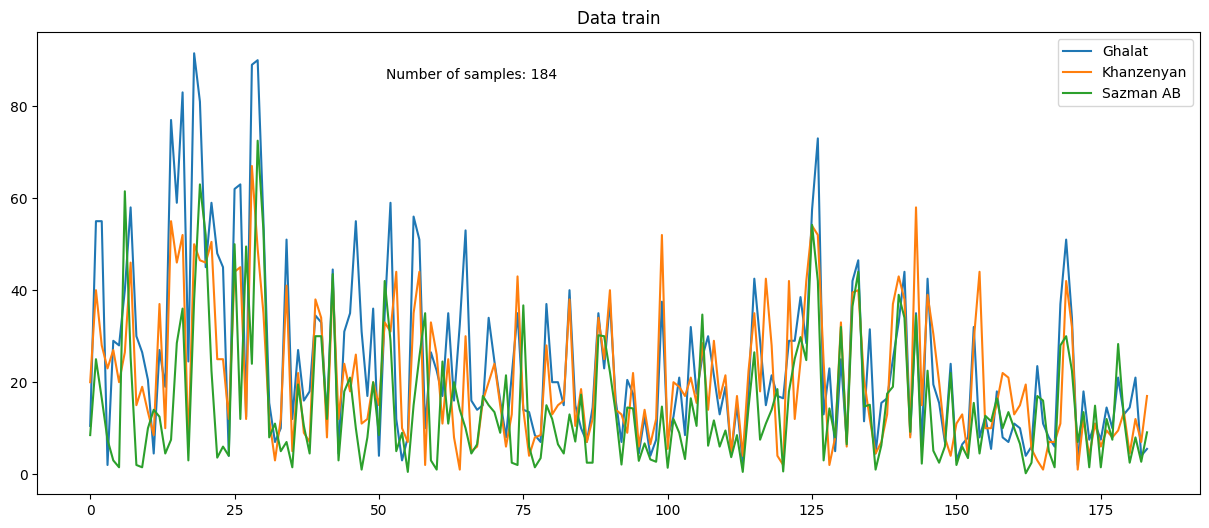

In [19]:
# X
plt.figure(figsize=(15,6))
plt.title("Data train")
plt.plot(X_train["ghalat rain"], label="Ghalat")
plt.plot(X_train["khanzenyan rain"], label="Khanzenyan")
plt.plot(X_train["sazman ab rain"], label= "Sazman AB")
plt.annotate(text=f"Number of samples: {X_train.shape[0]}", xy=(0.3, 0.9), xycoords="axes fraction")
plt.legend()

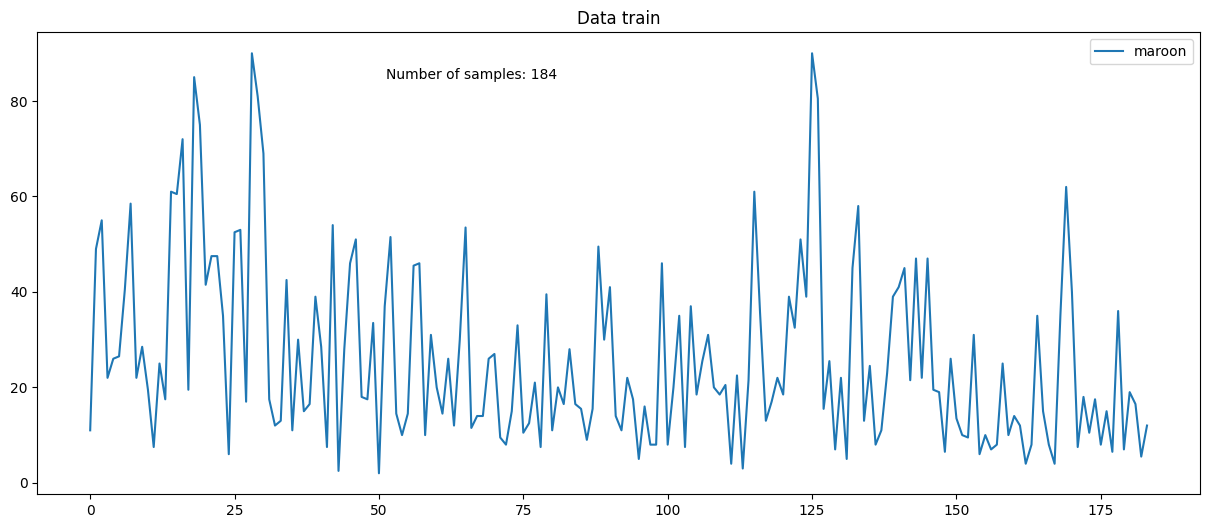

In [28]:
# Y
plt.figure(figsize=(15,6))
plt.title("Data train")
plt.plot(Y_train, label="maroon")
plt.annotate(text=f"Number of samples: {Y_train.shape[0]}", xy=(0.3, 0.9), xycoords="axes fraction")
plt.legend()

Visualize test data

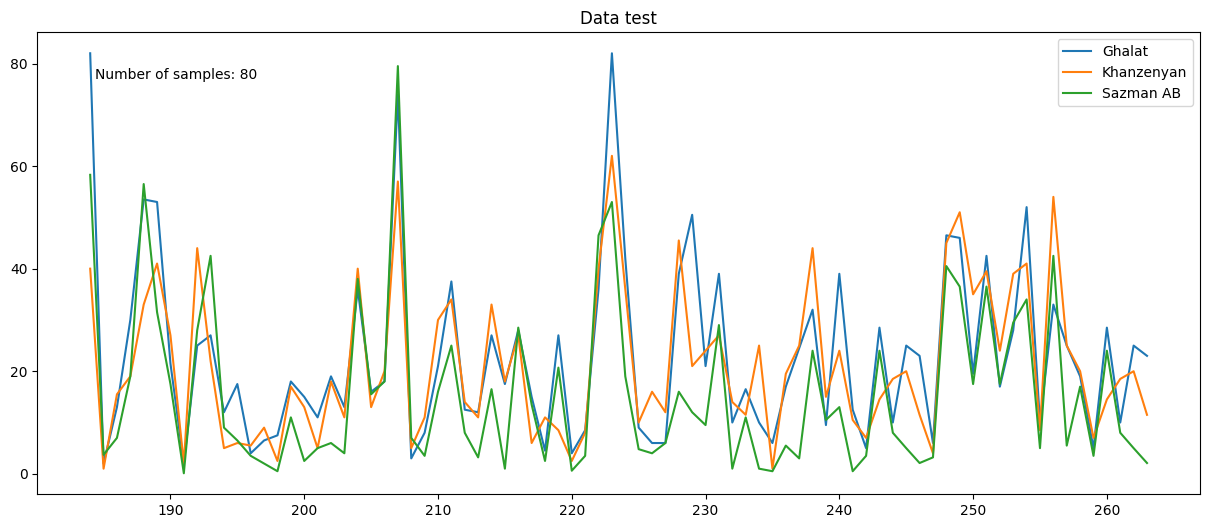

In [16]:
# X
plt.figure(figsize=(15,6))
plt.title("Data test")
plt.plot(X_test["ghalat rain"], label="Ghalat")
plt.plot(X_test["khanzenyan rain"], label="Khanzenyan")
plt.plot(X_test["sazman ab rain"], label= "Sazman AB")
plt.annotate(text=f"Number of samples: {X_test.shape[0]}", xy=(0.05, 0.9), xycoords="axes fraction")
plt.legend()

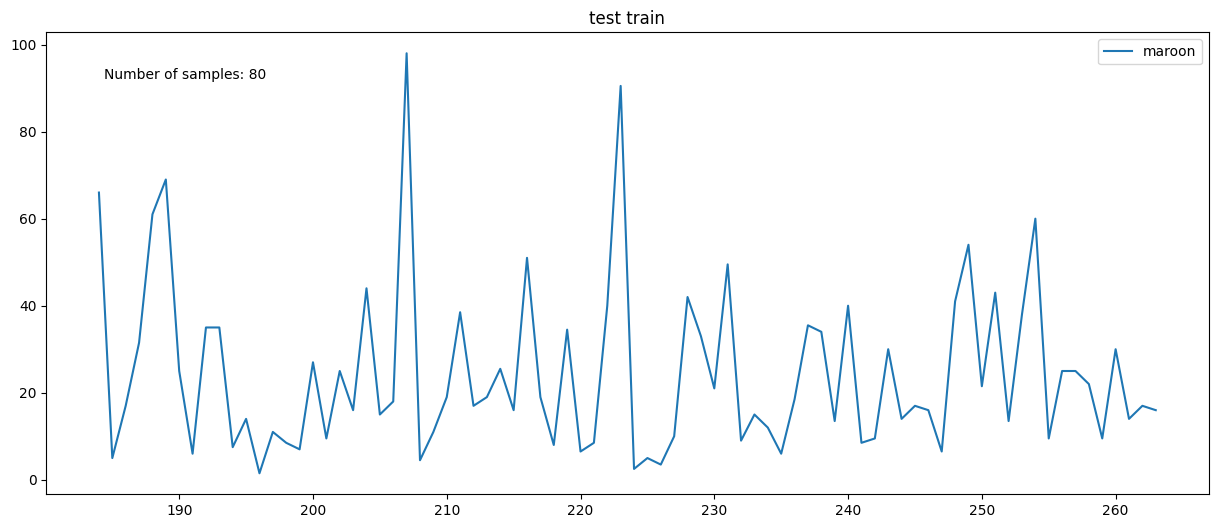

In [15]:
# Y
plt.figure(figsize=(15,6))
plt.title("test train")
plt.plot(Y_test, label="maroon")
plt.annotate(text=f"Number of samples: {Y_test.shape[0]}", xy=(0.05, 0.9), xycoords="axes fraction")
plt.legend()

## Scale

In [20]:
# Scale the features
scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [32]:
# Scale the target
scaler_Y = RobustScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

In [34]:
# for sklearn model, label should be in series format
Y_train_scaled  = Y_train_scaled.squeeze()
Y_test_scaled   = Y_train_scaled.squeeze()

In [83]:
# Train the model
model = MLPRegressor((100,100,100),
                        alpha=0.001,
                        solver='sgd',
                        max_iter=10000,
                        early_stopping=False,
                        n_iter_no_change=50)

model.fit(X_train_scaled, Y_train_scaled)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=10000,
             n_iter_no_change=50, solver='sgd')

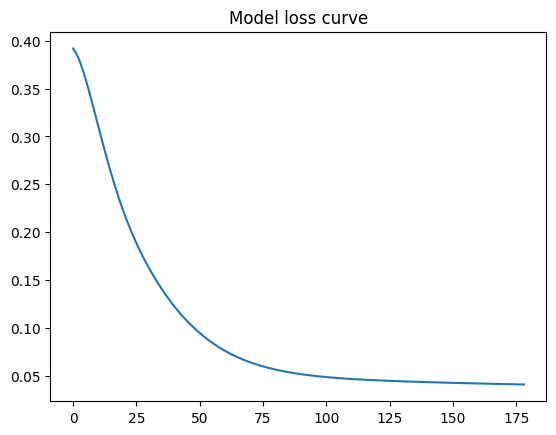

In [84]:
plt.title("Model loss curve")
plt.plot(model.loss_curve_)

In [50]:
# Make predictions
Y_pred_scaled = model.predict(X_test_scaled)

In [51]:
Y_pred_scaled = pd.DataFrame(Y_pred_scaled, columns=["maroon"])
Y_pred_scaled

,maroon
0,2.239332
1,-0.433228
2,-0.264995
3,0.381923
4,1.515239
...,...
75,-0.400978
76,0.332167
77,-0.272694
78,0.038723


In [54]:
# Inverse transform the predictions
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
Y_pred = pd.DataFrame(Y_pred, columns=["maroon"], index=Y_test.index)
Y_pred

,maroon
184,76.263206
185,9.115149
186,13.342009
187,29.595812
188,58.070388
...,...
259,9.925426
260,28.345698
261,13.148567
262,20.972911


Visualize prediction vs. observed

In [56]:
from sklearn.metrics import r2_score

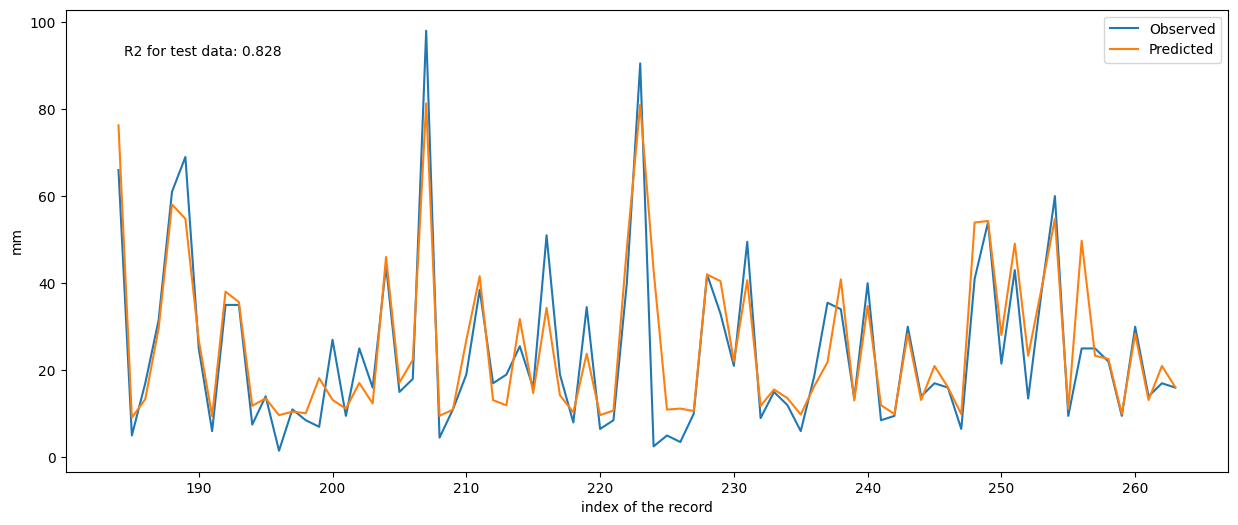

In [61]:
plt.figure(figsize=(15,6))
plt.plot(Y_test, label="Observed")
plt.plot(Y_pred, label="Predicted")
plt.annotate(text=f"R2 for test data: {round(r2_score(y_true=Y_test, y_pred=Y_pred),3)}", xy=(0.05, 0.9), xycoords="axes fraction")

plt.ylabel(ylabel="mm")
plt.xlabel(xlabel="index of the record")
plt.legend()

# Prediction for missed.xlsx

In [114]:
voroodi = pd.read_excel("missed.xlsx", sheet_name="missed")
voroodi = voroodi[["sazman ab rain", "khanzenyan rain", "ghalat rain"]]
voroodi

,sazman ab rain,khanzenyan rain,ghalat rain
0,6.4,13.0,10.5
1,11.3,13.0,26.5
2,0.4,10.0,18.0
3,2.0,18.0,29.0
4,21.0,10.0,13.0
...,...,...,...
311,26.0,72.0,129.5
312,77.5,28.0,48.0
313,5.0,28.0,42.0
314,38.5,10.0,5.5


In [115]:
khorooji = model.predict(X=voroodi)

c:\Users\alikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [116]:
khorooji = pd.DataFrame(khorooji,index=voroodi.index,columns=["maroon"])
khorooji.head()

,maroon
0,10.815024
1,17.423847
2,11.135913
3,18.789024
4,13.149449


Text(0, 0.5, 'mm')

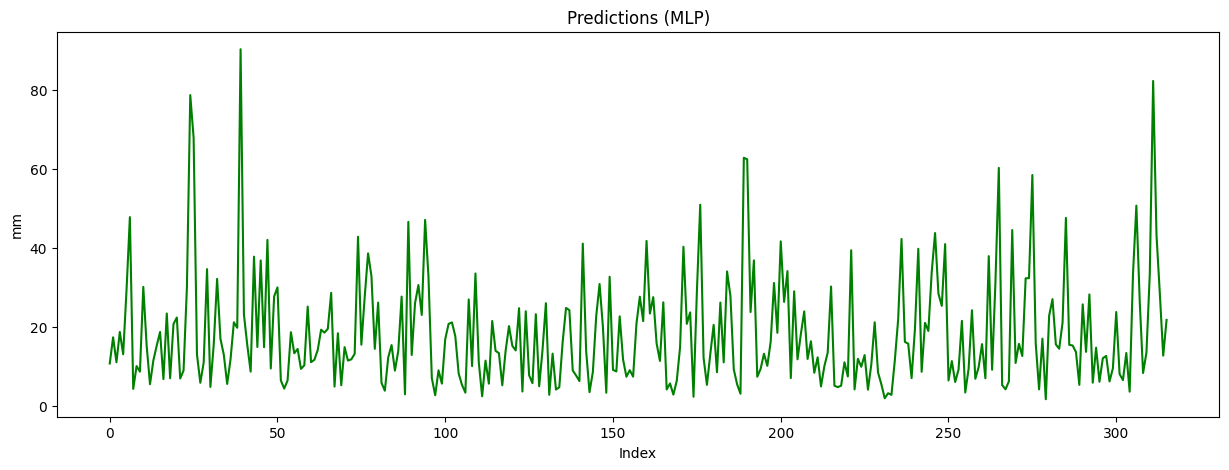

In [117]:
plt.figure(figsize=(15,5))
plt.plot(khorooji, color="green", ls="solid")
plt.title("Predictions (MLP)")
plt.xlabel("Index")
plt.ylabel("mm")

Do the whole code for 30 times.

C:\Users\alikh\AppData\Local\Temp\ipykernel_15328\2470535512.py:57: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


[0.03515770170873683, 0.03478784420945086, 0.03936308397973083]


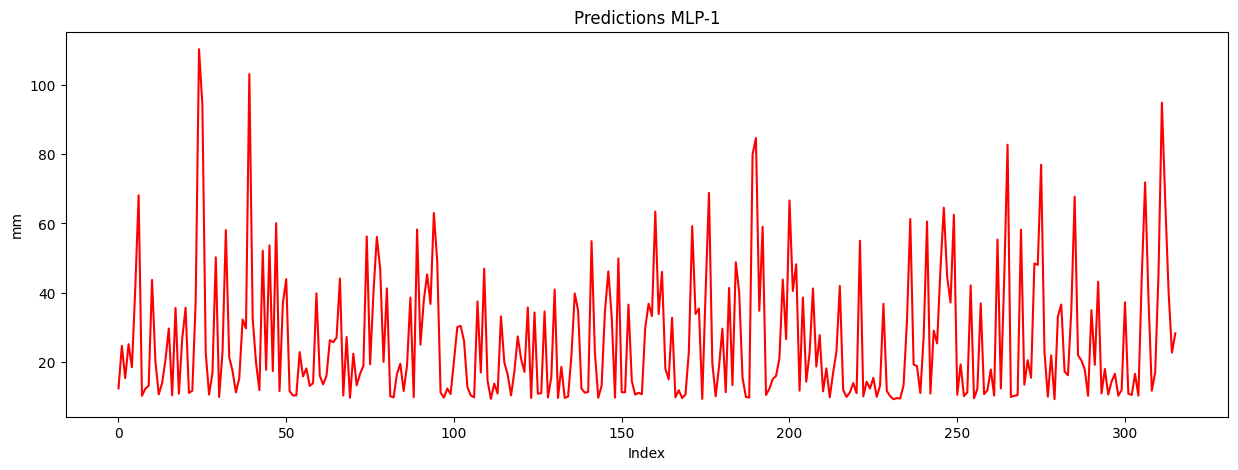

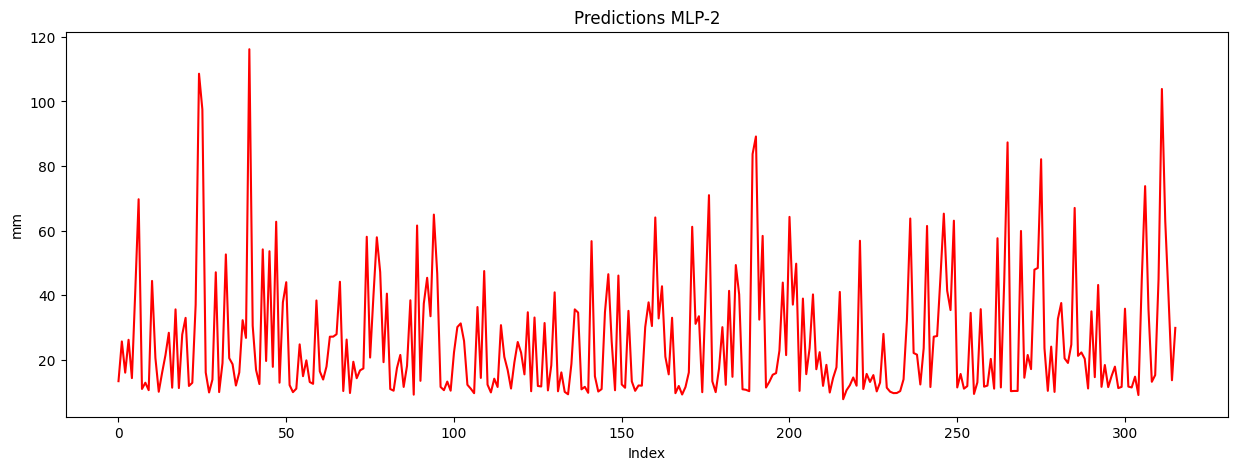

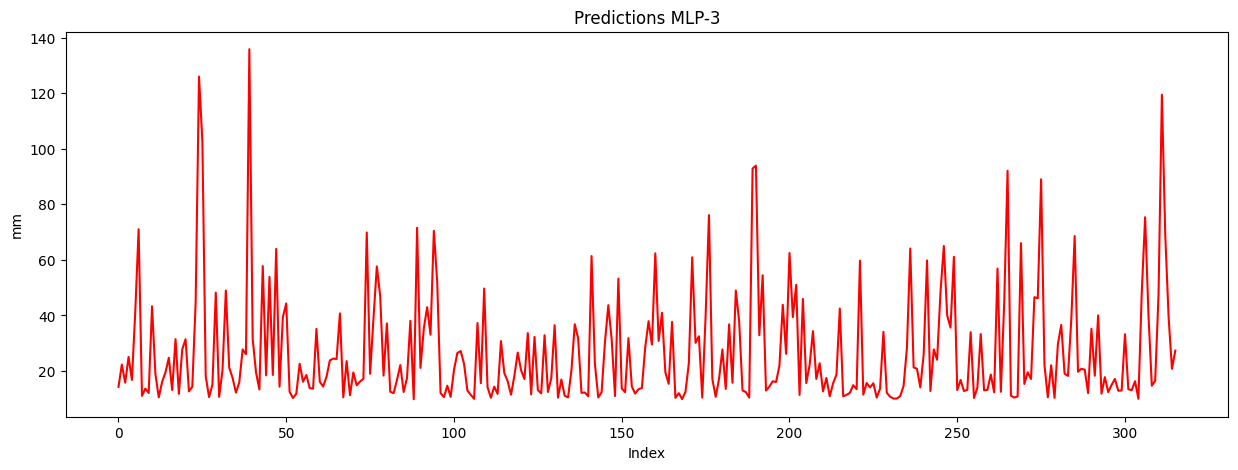

In [113]:
# train dataset
df = pd.read_excel("maroun.xlsx")

# Seperate X and Y
X = df[["sazman ab rain", "khanzenyan rain", "ghalat rain"]]
Y = df[["maroun rain"]]

# Scale the features
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X_train)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# Scale the target
scaler_Y = RobustScaler()
Y_scaled = scaler_Y.fit_transform(Y_train)
Y_scaled = pd.DataFrame(Y_scaled, columns=Y.columns)
Y_scaled = Y_scaled.squeeze()

# unseen data
voroodi = pd.read_excel("missed.xlsx", sheet_name="missed")
voroodi = voroodi[["sazman ab rain", "khanzenyan rain", "ghalat rain"]]
voroodi_scaled = scaler_X.fit_transform(voroodi)
voroodi_scaled = pd.DataFrame(voroodi_scaled, columns=voroodi.columns)

model_loss = []
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('khorooji-MLP.xlsx')

for i in range(1,31):
    mlp = MLPRegressor((100,100,100),
                        alpha=0.001,
                        solver='sgd',
                        max_iter=10000,
                        early_stopping=False,
                        n_iter_no_change=50)

    mlp.fit(X_scaled, Y_scaled)
    ml = mlp.best_loss_
    model_loss.append(ml)
    
    khorooji_scaled = mlp.predict(X=voroodi_scaled)
    khorooji_scaled = pd.DataFrame(khorooji_scaled, columns=["maroon"])
    khorooji = scaler_Y.inverse_transform(khorooji_scaled)
    khorooji = pd.DataFrame(khorooji,index=voroodi.index, columns=["maroon"])

    plt.figure(figsize=(15,5))
    plt.plot(khorooji, color="red", ls="solid")
    plt.title(f"Predictions MLP-{i}")
    plt.xlabel("Index")
    plt.ylabel("mm")
    plt.savefig(f"khorooji-MLP-{i}")
    
    # Write each dataframe to a different worksheet.
    khorooji.to_excel(writer, sheet_name=str(f"model-MLP-{i}"))

# Close the Pandas Excel writer and output the Excel file.
writer.save()

print(model_loss)